## Домашнее задание по теме "Корреляция и корреляционный анализ"

Возьмите датасет Mortality and Water Hardness:

https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.


#### 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
- a. Построить точечный график
- b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
- c. Построить модель линейной регрессии
- d. Рассчитать коэффициент детерминации
- e. Вывести график остатков

#### 2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- a. Разделить данные на 2 группы
- b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

In [3]:
water = pd.read_csv('C:\\Users\\2-hom\\Documents\\Data_analysis\\Pyton_Notebook\\Статистика\\Занятие_4\\water.csv')

In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [5]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [6]:
water.rename(columns={'location': 'Расположение', 'town': 'Город', 'mortality':'Смертность', 'hardness':'Жесткость воды'
                     },
                     inplace=True)
water.head()

,Unnamed: 0,Расположение,Город,Смертность,Жесткость воды
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### Корреляция

<AxesSubplot:title={'center':'Корреляция между смертностью и жесткостью воды'}, xlabel='Жесткость воды', ylabel='Смертность'>

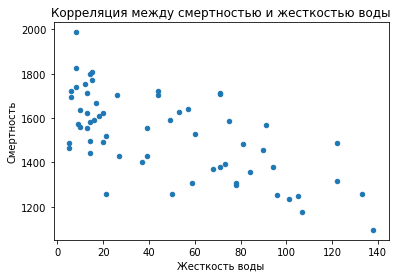

In [7]:
# Построим точечную диаграмму и посмотрим на взаимосвязь между смертностью и жесткостью воды

water.plot(kind='scatter', 
        x='Жесткость воды', 
        y='Смертность', 
        title='Корреляция между смертностью и жесткостью воды')

На точечной диаграмме видна обратная зависимость уровня смертности от уровня жесткости воды: чем меньже жесткость воды, тем выше смертность. Можно предположить следующую гипотезу: на жесткость воды в первую очередь влияют ионы кальция и магния, человеческий организм не сильно зависит от  снижения кальция в воде, т.к. получает его при потреблении молочной пищи, в то время как магний в составе пищевых продуктов потребляется в меньших количествах. Нехватка магния в организме ведет к заболеваниям сердечно-сосудистой системы, а следовательно повышается риск смертности от них.

In [8]:
# Рассчитаем коэффициенты корреляции Пирсона, Спирмена и Кендалла

water[['Жесткость воды', 'Смертность']].corr()        

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.654849
Смертность,-0.654849,1.000000


Коэффициент Пирсона равен -0.65, что подтверждает нашу гипотезу обратной взаимосвязи. Взаимосвязь чуть выше средней.

In [9]:
water[['Жесткость воды', 'Смертность']].corr(method='spearman')

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.631665
Смертность,-0.631665,1.000000


Коэффициент Спирмана равен -0.63, что также говорит о наличии обратной взаимосвяви.

In [10]:
water[['Жесткость воды', 'Смертность']].corr(method='kendall')

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.453753
Смертность,-0.453753,1.000000


Коэффициент Кенделла равен -0.45, что также говорит о наличии средней обратной взаимосвязи.

### Регрессия

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Построение модели линейной регрессии

In [12]:
X = water[['Жесткость воды']]
y = water['Смертность']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
X_train.shape

(42, 1)

In [15]:
y_train.shape

(42,)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [17]:
model.coef_

array([-3.13167087])

In [18]:
model.intercept_

1668.9722977277095

Уравнение модели: у = -3.13 * х + 1668.97

In [19]:
y_pred = model.predict(X_test)   # прогнозные данные модели
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [20]:
# сравним пронозы, построенные моделью, с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,Жесткость воды,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


#### Коэфициент детерминации

In [21]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

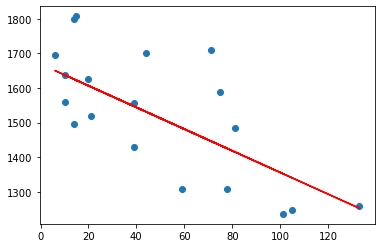

In [22]:
plt.scatter(X_test, y_test)      # построение графика прогнозной модели
plt.plot(X_test, y_pred, c='r')

#### График остатков

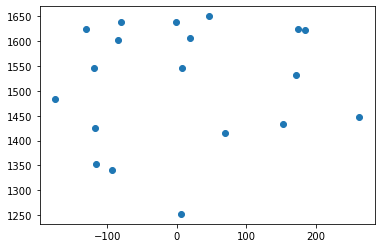

In [23]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)

#### Альтернативный способ из statsmodel

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
X_const = sm.add_constant(X_train)

In [27]:
X_const.shape

(42, 2)

In [28]:
X[:5]

,Жесткость воды
0,105
1,17
2,5
3,14
4,18


In [29]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Смертность   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           7.83e-06
Time:                        07:39:27   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1668.9723     36.543     45.

In [30]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const             1668.972298
Жесткость воды      -3.131671
dtype: float64
R2:  0.396789010091228


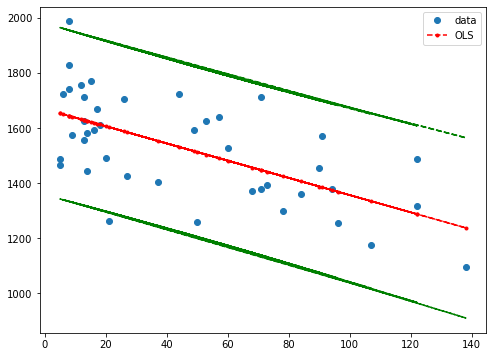

In [31]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

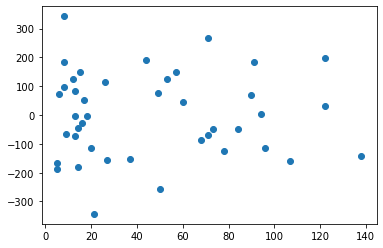

In [32]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

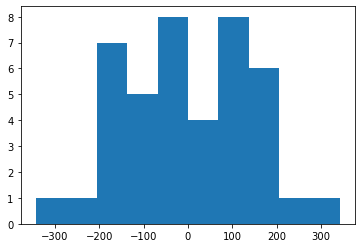

In [33]:
plt.hist(results.resid)

### 2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

#### Анализ данных для городов юга

In [34]:
water_south = water[(water['Расположение'] == 'South')]
water_south.head(26)

,Unnamed: 0,Расположение,Город,Смертность,Жесткость воды
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [35]:
water_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      26 non-null     int64 
 1   Расположение    26 non-null     object
 2   Город           26 non-null     object
 3   Смертность      26 non-null     int64 
 4   Жесткость воды  26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [36]:
# Т.к. на юге Англии вода жесткая, то уберем из данных выбросы (города с мягкой водой (жесткость меньше 10))

water_south = water[(water['Расположение'] == 'South') & (water['Жесткость воды'] > 10)]
water_south.info()
water_south.head(24)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 59
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      24 non-null     int64 
 1   Расположение    24 non-null     object
 2   Город           24 non-null     object
 3   Смертность      24 non-null     int64 
 4   Жесткость воды  24 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


,Unnamed: 0,Расположение,Город,Смертность,Жесткость воды
0,1,South,Bath,1247,105
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21
25,26,South,Ipswich,1096,138


#### Корреляционный анализ для городов юга

<AxesSubplot:title={'center':'Корреляция между смертностью и жесткостью воды'}, xlabel='Жесткость воды', ylabel='Смертность'>

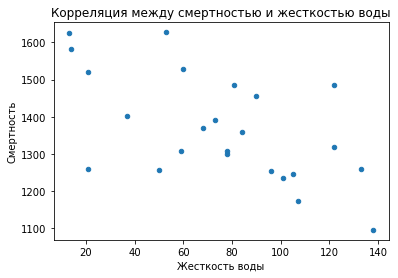

In [37]:
# Построим точечную диаграмму и посмотрим на взаимосвязь между смертностью и жесткостью воды

water_south.plot(kind='scatter', 
        x='Жесткость воды', 
        y='Смертность', 
        title='Корреляция между смертностью и жесткостью воды')

In [38]:
# Рассчитаем коэффициенты корреляции Пирсона, Спирмена и Кендалла

water_south[['Жесткость воды', 'Смертность']].corr()  

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.584542
Смертность,-0.584542,1.000000


In [39]:
water_south[['Жесткость воды', 'Смертность']].corr(method='spearman')

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.570807
Смертность,-0.570807,1.000000


In [40]:
water_south[['Жесткость воды', 'Смертность']].corr(method='kendall')

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.433522
Смертность,-0.433522,1.000000


Коэффициенты корреляции уровня смертности и жесткости воды для городов юга чуть ниже чем по Англии в целом

#### Регрессионный анализ для городов юга

In [41]:
X = water_south[['Жесткость воды']]
y = water_south['Смертность']

In [42]:
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [43]:
X_south_train.shape

(21, 1)

In [44]:
y_south_train.shape

(21,)

In [45]:
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)

LinearRegression()

In [50]:
model_south.coef_

array([-2.5828585])

In [51]:
model_south.intercept_

1579.7698975474545

Уравнение модели: у = -2.58 * х + 1579.76

In [52]:
y_south_pred = model_south.predict(X_south_test)   # прогнозные данные модели
y_south_pred

array([1525.52986913, 1318.90118943, 1308.56975545])

In [53]:
# сравним пронозы, построенные моделью, с фактом
res_south_df = X_south_test.copy()

res_south_df['y_south_pred'] = y_south_pred
res_south_df['y_south_test'] = y_south_test
res_south_df

,Жесткость воды,y_south_pred,y_south_test
19,21,1525.529869,1260
41,101,1318.901189,1236
0,105,1308.569755,1247


##### Коэфициент детерминации для городов юга

In [54]:
model_south.score(X_south_test, y_south_test) # метод возвращает значение коэффициента детерминации

-280.1878293090216

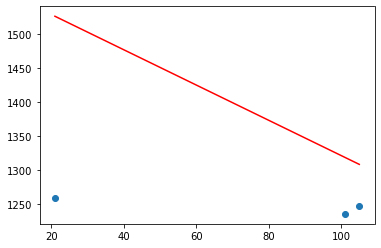

In [55]:
plt.scatter(X_south_test, y_south_test)      # построение графика прогнозной модели
plt.plot(X_south_test, y_south_pred, c='r')

По графику видно, что из-за небольшого количества данных и их разрозненности модель дает очень большую погрешность.

##### График остатков по городам юга

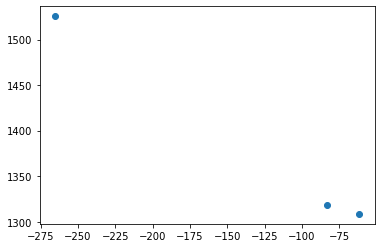

In [56]:
residuals = y_south_test - y_south_pred
plt.scatter(residuals, y_south_pred)

#### Альтернативный способ из statsmodel  для городов юга

In [63]:
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [64]:
X_south_const = sm.add_constant(X_south_train)

In [65]:
X_south_const.shape

(21, 2)

In [66]:
X[:5]

,Жесткость воды
0,105
7,78
9,84
10,73
12,21


In [67]:
model_south = sm.OLS(y_south_train, X_south_const)
results_south = model_south.fit()
print(results_south.summary())

                            OLS Regression Results                            
Dep. Variable:             Смертность   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     14.40
Date:                Fri, 23 Jul 2021   Prob (F-statistic):            0.00122
Time:                        07:41:35   Log-Likelihood:                -127.86
No. Observations:                  21   AIC:                             259.7
Df Residuals:                      19   BIC:                             261.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1579.7699     56.666     27.

In [68]:
print('Parameters: ', results_south.params)
print('R2: ', results_south.rsquared)

Parameters:  const             1579.769898
Жесткость воды      -2.582858
dtype: float64
R2:  0.431159540713301


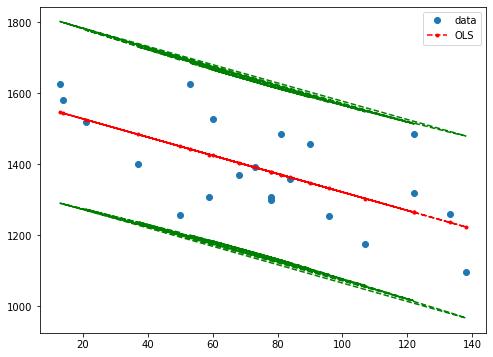

In [69]:
prstd, iv_l, iv_u = wls_prediction_std(results_south) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_south_const.iloc[:, 1], y_south_train, 'o', label="data")
ax.plot(X_south_const.iloc[:, 1], results_south.fittedvalues, 'r--.', label="OLS")
ax.plot(X_south_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_south_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

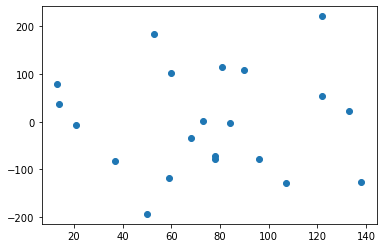

In [70]:
# посмотрим на остатки
plt.scatter(X_south_const.iloc[:, 1], results_south.resid)

(array([1., 3., 4., 1., 3., 3., 1., 3., 0., 2.]),
 array([-193.62697274, -152.13039157, -110.63381039,  -69.13722922,
         -27.64064805,   13.85593313,   55.3525143 ,   96.84909547,
         138.34567664,  179.84225782,  221.33883899]),
 <BarContainer object of 10 artists>)

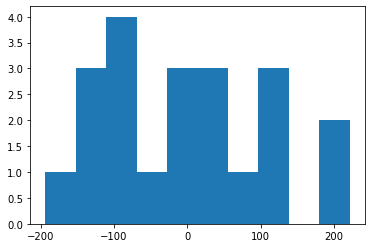

In [71]:
plt.hist(results_south.resid)

#### Анализ данных для городов севера

In [72]:
water_north = water[(water['Расположение'] == 'North')]
water_north.info()
water_north.head(35)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      35 non-null     int64 
 1   Расположение    35 non-null     object
 2   Город           35 non-null     object
 3   Смертность      35 non-null     int64 
 4   Жесткость воды  35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


,Unnamed: 0,Расположение,Город,Смертность,Жесткость воды
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


 Как видно из полученных данных на севере вода более мягкая, чем на юге. Следовательно, согласно нашей гипотезе и уровень смертности должен быть ниже, чем на юге

#### Корреляционный анализ для городов севера

<AxesSubplot:title={'center':'Корреляция между смертностью и жесткостью воды'}, xlabel='Жесткость воды', ylabel='Смертность'>

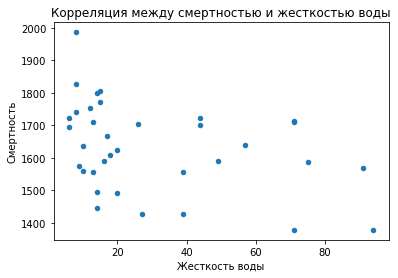

In [73]:
water_north.plot(kind='scatter', 
        x='Жесткость воды', 
        y='Смертность', 
        title='Корреляция между смертностью и жесткостью воды')

In [74]:
# Рассчитаем коэффициенты корреляции Пирсона, Спирмена и Кендалла

water_north[['Жесткость воды', 'Смертность']].corr()

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.368598
Смертность,-0.368598,1.000000


In [75]:
water_north[['Жесткость воды', 'Смертность']].corr(method='spearman')

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.404208
Смертность,-0.404208,1.000000


In [76]:
water_north[['Жесткость воды', 'Смертность']].corr(method='kendall')

,Жесткость воды,Смертность
Жесткость воды,1.000000,-0.283058
Смертность,-0.283058,1.000000


Действительно, коэффициенты корреляции на севере значительно ниже, чем на юге и для Англии в целом, что подтверждает нашу гипотезу. 

#### Регрессионный анализ для городов севера

In [78]:
X = water_north[['Жесткость воды']]
y = water_north['Смертность']

In [79]:
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [80]:
X_north_train.shape

(31, 1)

In [81]:
y_north_train.shape

(31,)

In [82]:
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train)

LinearRegression()

In [83]:
model_north.coef_

array([-1.822715])

In [84]:
model_north.intercept_

1687.7073646127963

Уравнение модели: у = -1.82 * х + 1687.70

Видно, что для севера, где вода более жесткая уравнение корреляции ближе к общему для Англии

In [85]:
y_north_pred = model_north.predict(X_north_test)   # прогнозные данные модели
y_north_pred

array([1673.12564463, 1671.30292963, 1662.18935464, 1676.77107462])

In [86]:
# сравним пронозы, построенные моделью, с фактом
res_north_df = X_north_test.copy()

res_north_df['y_south_pred'] = y_north_pred
res_north_df['y_south_test'] = y_north_test
res_north_df

,Жесткость воды,y_south_pred,y_south_test
45,8,1673.125645,1987
23,9,1671.302930,1574
43,14,1662.189355,1444
36,6,1676.771075,1724


##### Коэфициент детерминации для городов севера

In [87]:
model_north.score(X_north_test, y_north_test) # метод возвращает значение коэффициента детерминации

0.032340393386281474

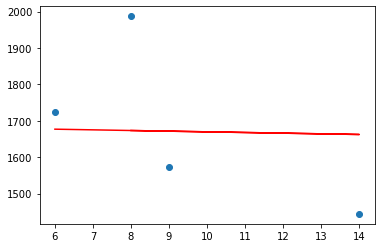

In [88]:
plt.scatter(X_north_test, y_north_test)      # построение графика прогнозной модели
plt.plot(X_north_test, y_north_pred, c='r')

##### График остатков по городам севера

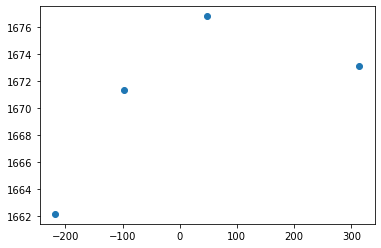

In [89]:
residuals = y_north_test - y_north_pred
plt.scatter(residuals, y_north_pred)

##### Альтернативный способ из statsmodel для городов севера

In [90]:
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [91]:
X_north_const = sm.add_constant(X_north_train)

In [92]:
X_north_const.shape

(31, 2)

In [93]:
X[:5]

,Жесткость воды
1,17
3,14
4,18
5,10
6,15


In [94]:
model_north = sm.OLS(y_north_train, X_north_const)
results_north = model_north.fit()
print(results_north.summary())

                            OLS Regression Results                            
Dep. Variable:             Смертность   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.183
Date:                Fri, 23 Jul 2021   Prob (F-statistic):             0.0304
Time:                        07:44:20   Log-Likelihood:                -190.44
No. Observations:                  31   AIC:                             384.9
Df Residuals:                      29   BIC:                             387.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1687.7074     33.780     49.

In [95]:
print('Parameters: ', results_north.params)
print('R2: ', results_north.rsquared)

Parameters:  const             1687.707365
Жесткость воды      -1.822715
dtype: float64
R2:  0.1516357215068287


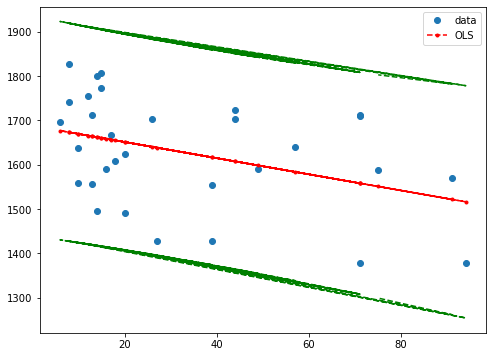

In [96]:
prstd, iv_l, iv_u = wls_prediction_std(results_north) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_north_const.iloc[:, 1], y_north_train, 'o', label="data")
ax.plot(X_north_const.iloc[:, 1], results_north.fittedvalues, 'r--.', label="OLS")
ax.plot(X_north_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_north_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

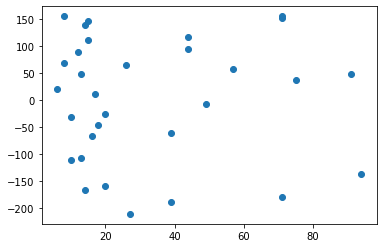

In [97]:
# посмотрим на остатки
plt.scatter(X_north_const.iloc[:, 1], results_north.resid)

(array([3., 2., 3., 1., 3., 2., 3., 5., 4., 5.]),
 array([-211.49405967, -174.85721816, -138.22037666, -101.58353515,
         -64.94669365,  -28.30985215,    8.32698936,   44.96383086,
          81.60067236,  118.23751387,  154.87435537]),
 <BarContainer object of 10 artists>)

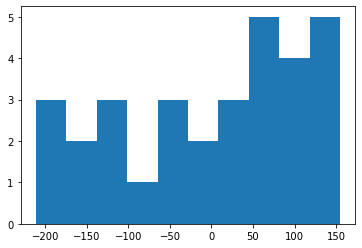

In [98]:
plt.hist(results_north.resid)